# Breast Cancer Diagnosis

## 1. Importing Necessary Libraries

In [218]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("max_columns", 100)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# time
import time

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Dataset

In [219]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

## 3. Exploratory Data Analysis

In [220]:
df.shape

(569, 33)

In [221]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [222]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
57,857793,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.02855,0.025720,0.012720,0.01817,0.004108,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940,NaN
433,908445,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,0.8191,1.9310,4.493,103.90,0.008074,0.04088,0.053210,0.018340,0.02383,0.004515,22.66,30.93,145.30,1603.0,0.13900,0.3463,0.39120,0.17080,0.3007,0.08314,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.14070,0.4186,0.65990,0.25420,0.2929,0.09873,NaN
450,9111596,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,0.2560,1.5540,1.955,20.24,0.006854,0.06063,0.066630,0.015530,0.02354,0.008925,12.79,28.18,83.51,507.2,0.09457,0.3399,0.32180,0.08750,0.2305,0.09952,NaN
418,906024,B,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,0.2253,0.6457,1.527,17.37,0.006131,0.01263,0.009075,0.008231,0.01713,0.004414,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464,NaN


In [223]:
del df["Unnamed: 32"]

In [224]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [225]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [226]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [227]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 4. Data Visualization

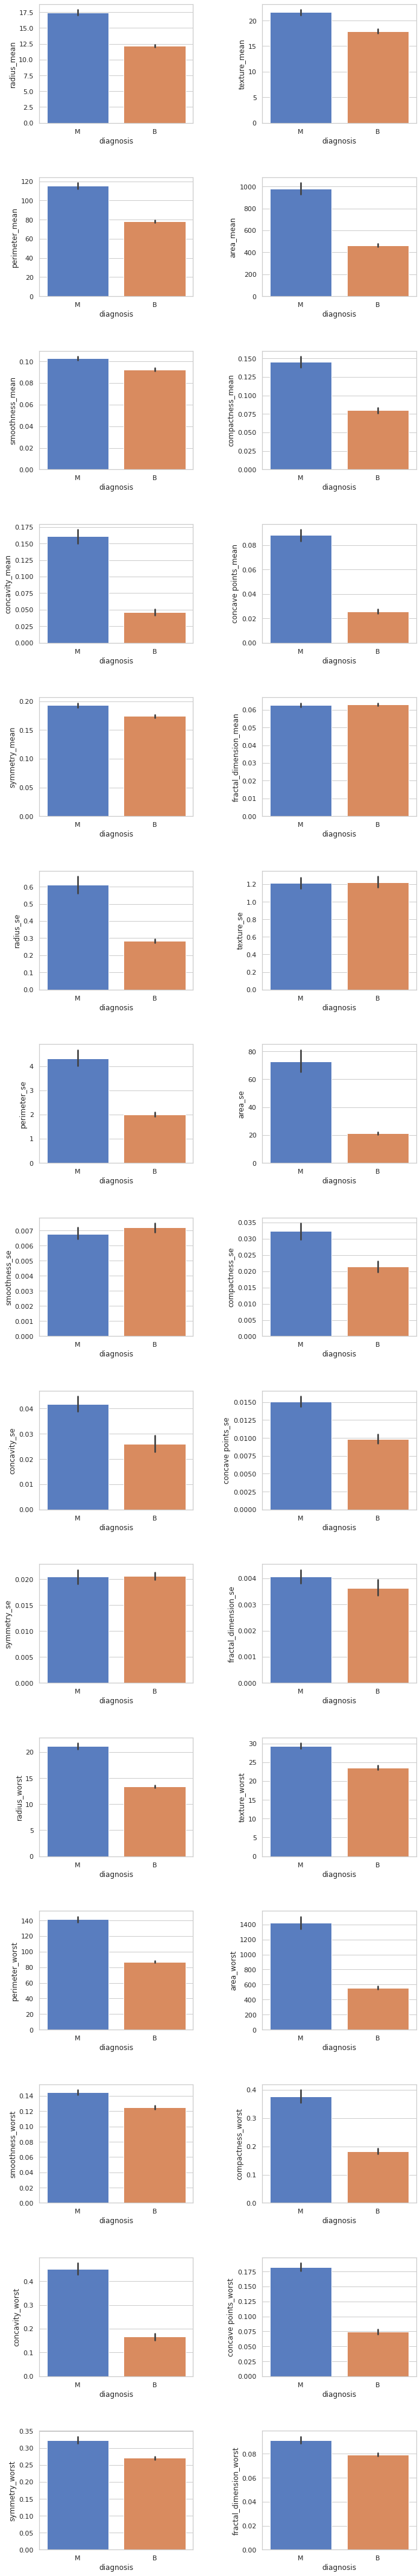

In [228]:
ctr = 1
figure = plt.figure(figsize = (11,64))
for i in df.columns:
    if ((i == "id") | (i == "diagnosis")):
        continue
    plt.subplot(16,2,ctr)
    figure.tight_layout(pad=5.0)
    ctr += 1
    sns.barplot(x = "diagnosis", y = i, data = df)

**Here we are using violin plot to see the difference between Benign and Malignant Tumors clearly. Before violin and swarm plot we need to normalization or standardization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.**

**Here's what we do here: With pd.concat we combine the diagnosis column with the first 10 features. Next, we reshape the names of the properties as a column with the pd.melt method. And in this way, our data becomes available for the violinplot method.**


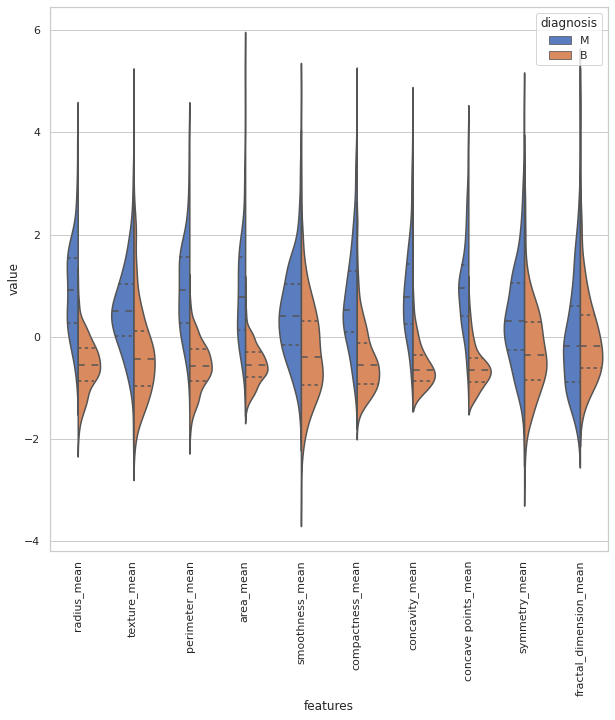

In [229]:
data_y = df["diagnosis"]
data_x = df.drop(["id","diagnosis"], axis = 1)

data_n_2 = (data_x - data_x.mean()) / (data_x.std()) # standardization

data_x = pd.concat([data_y, data_n_2.iloc[:,0:10]], axis = 1)
data_x = pd.melt(data_x,id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data_x, split = True, inner = "quart")
plt.xticks(rotation = 90);

**Here we can say for feature radius_mean, classifier can distinguish the benign and malignant tumor, because when we look at violin plot of radius_mean wee see that the distribution is quite different. But for example, fractal_dimension_mean is not good for classification because it is hard to distinguish. The values are close to each other.**

**We are plotting second ten features**

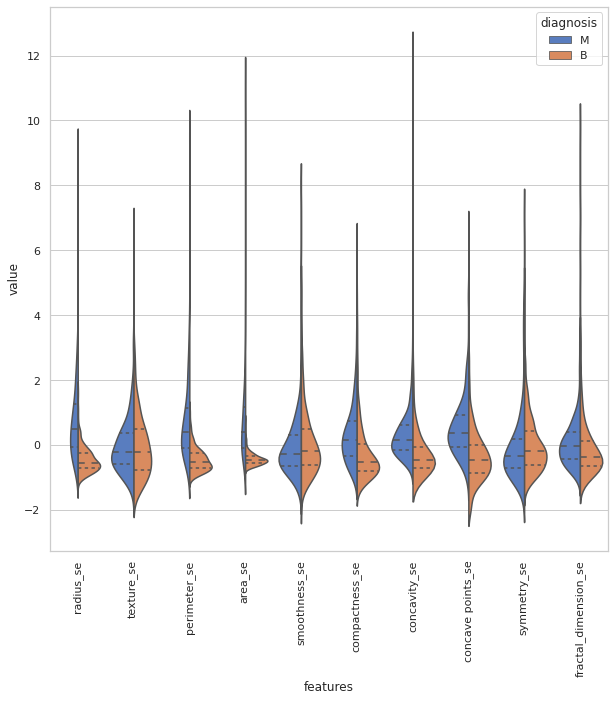

In [230]:
# Second ten features

data_x = pd.concat([data_y, data_n_2.iloc[:,10:20]], axis = 1)
data_x = pd.melt(data_x,id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data_x, split = True, inner = "quart")
plt.xticks(rotation = 90);

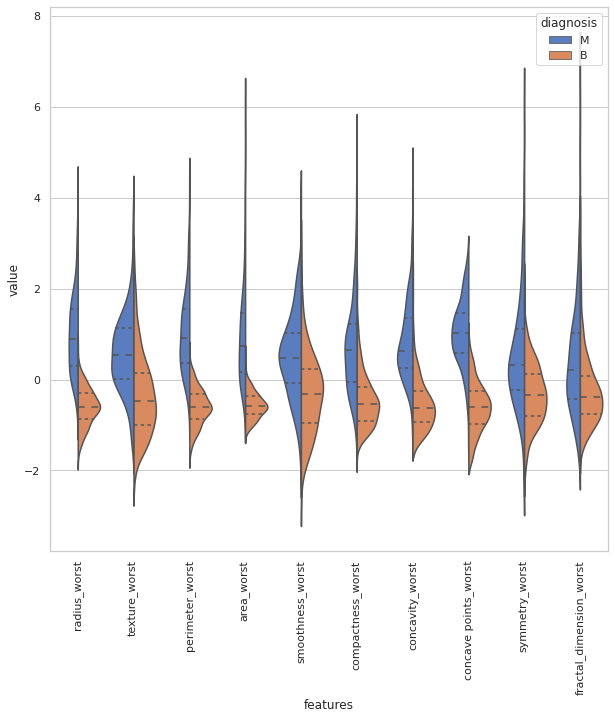

In [231]:
# Third ten features

data_x = pd.concat([data_y, data_n_2.iloc[:,20:31]], axis = 1)
data_x = pd.melt(data_x,id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data_x, split = True, inner = "quart")
plt.xticks(rotation = 90);

**We can say same interpretation here as we did above.**

**We can also use boxplot**

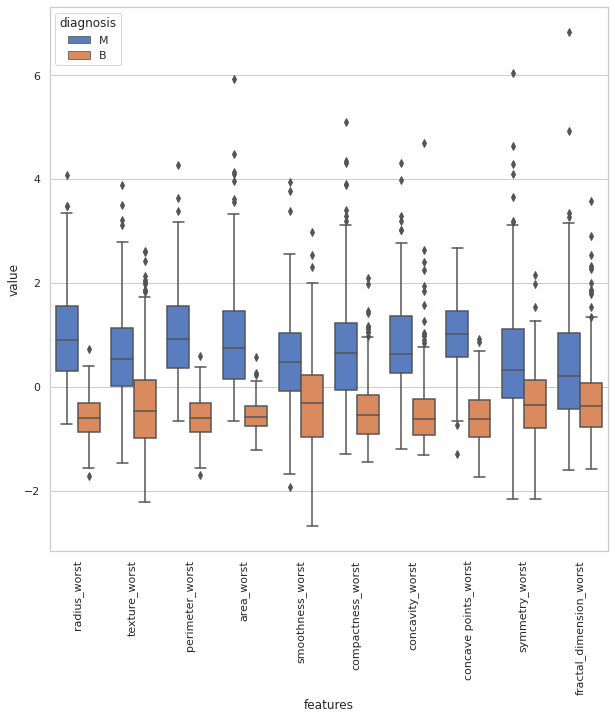

In [232]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_x)
plt.xticks(rotation = 90);

**In the second violin plot, we saw that the distributions of radius_se and perimeter_se are very similar. Now we draw the correlation value and graph between them. This way we can delete one if the correlation is too high.**

              radius_se  perimeter_se
radius_se      1.000000      0.972794
perimeter_se   0.972794      1.000000


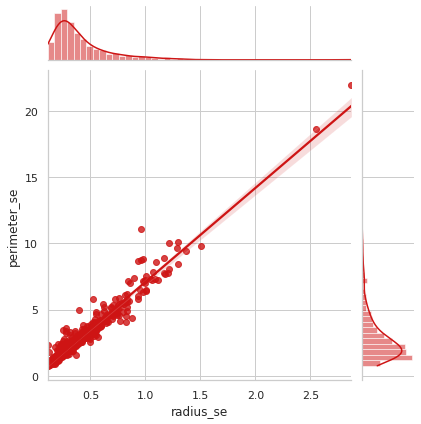

In [233]:
x = df.drop(["id", "diagnosis"], axis = 1)

sns.jointplot(x.loc[:,'radius_se'], x.loc[:,'perimeter_se'], kind = "reg", color = "#ce1414")

temp = df[["radius_se", "perimeter_se"]]
print(temp.corr())

**As you can see correlation is 0.97 so we can drop one of these because both of them carry roughly same information.**

**Now we use swarm plot to see the difference better.**

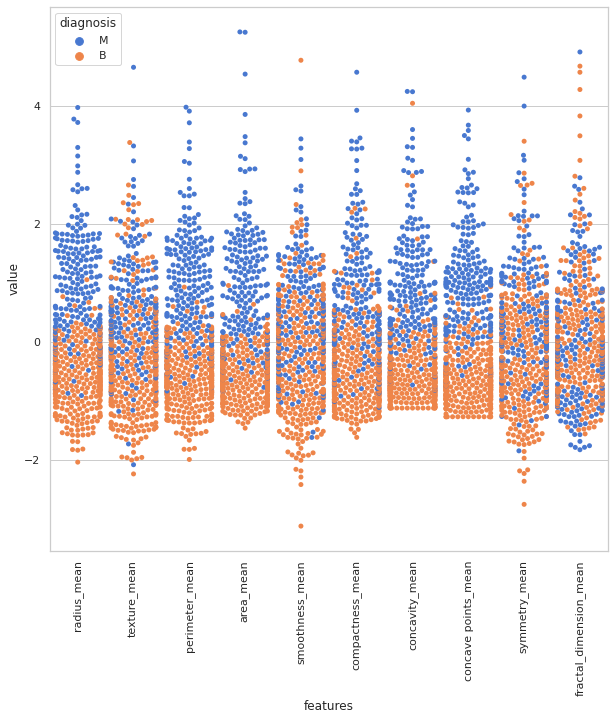

In [234]:
sns.set(style="whitegrid", palette="muted")

data_x = pd.concat([data_y, data_n_2.iloc[:,0:10]], axis = 1)
data_x = pd.melt(data_x, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
tic = time.time()
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data_x)
plt.xticks(rotation = 90);

**We are plotting second ten features.**

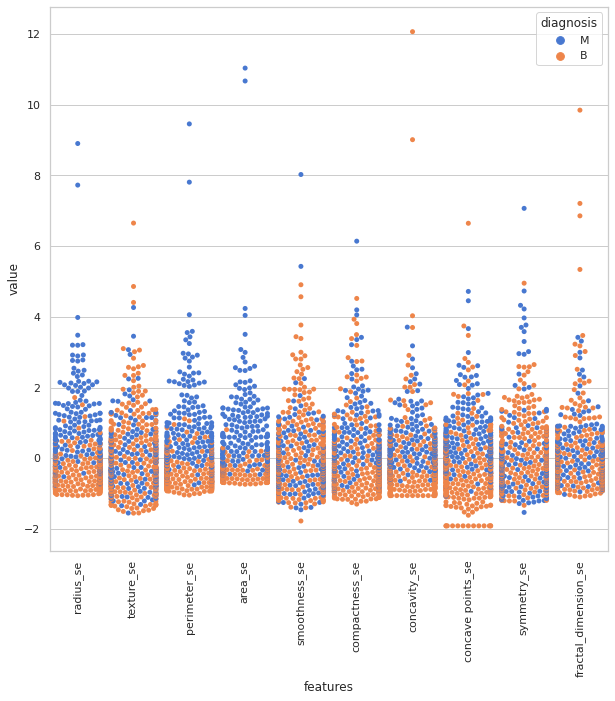

In [235]:
data_x = pd.concat([data_y, data_n_2.iloc[:,10:20]], axis = 1)
data_x = pd.melt(data_x, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
tic = time.time()
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data_x)
plt.xticks(rotation = 90);

**We are plotting third ten features.**

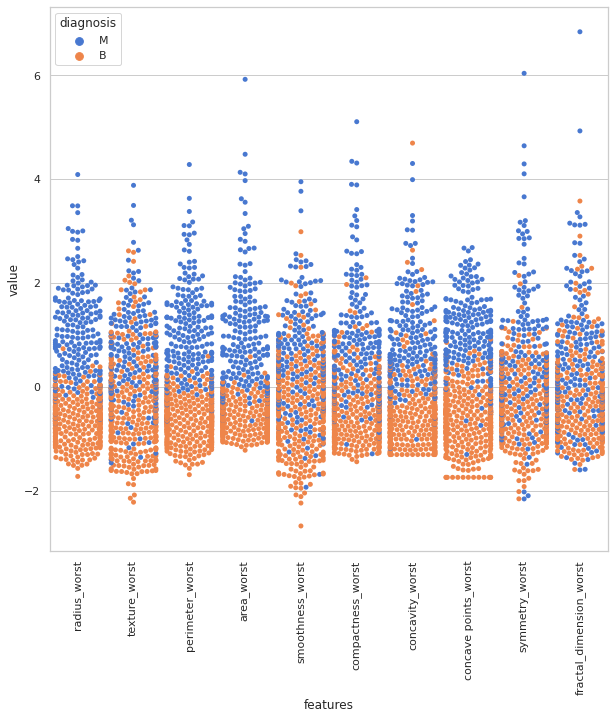

In [236]:
data_x = pd.concat([data_y, data_n_2.iloc[:,20:31]], axis = 1)
data_x = pd.melt(data_x, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
tic = time.time()
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data = data_x)
plt.xticks(rotation = 90);

**We can see the distrubiton more clear, right? For example it is easy to distinguish perimeter_worst but it is hard to distinguish smoothness_se**

### All correlation between features

<AxesSubplot:>

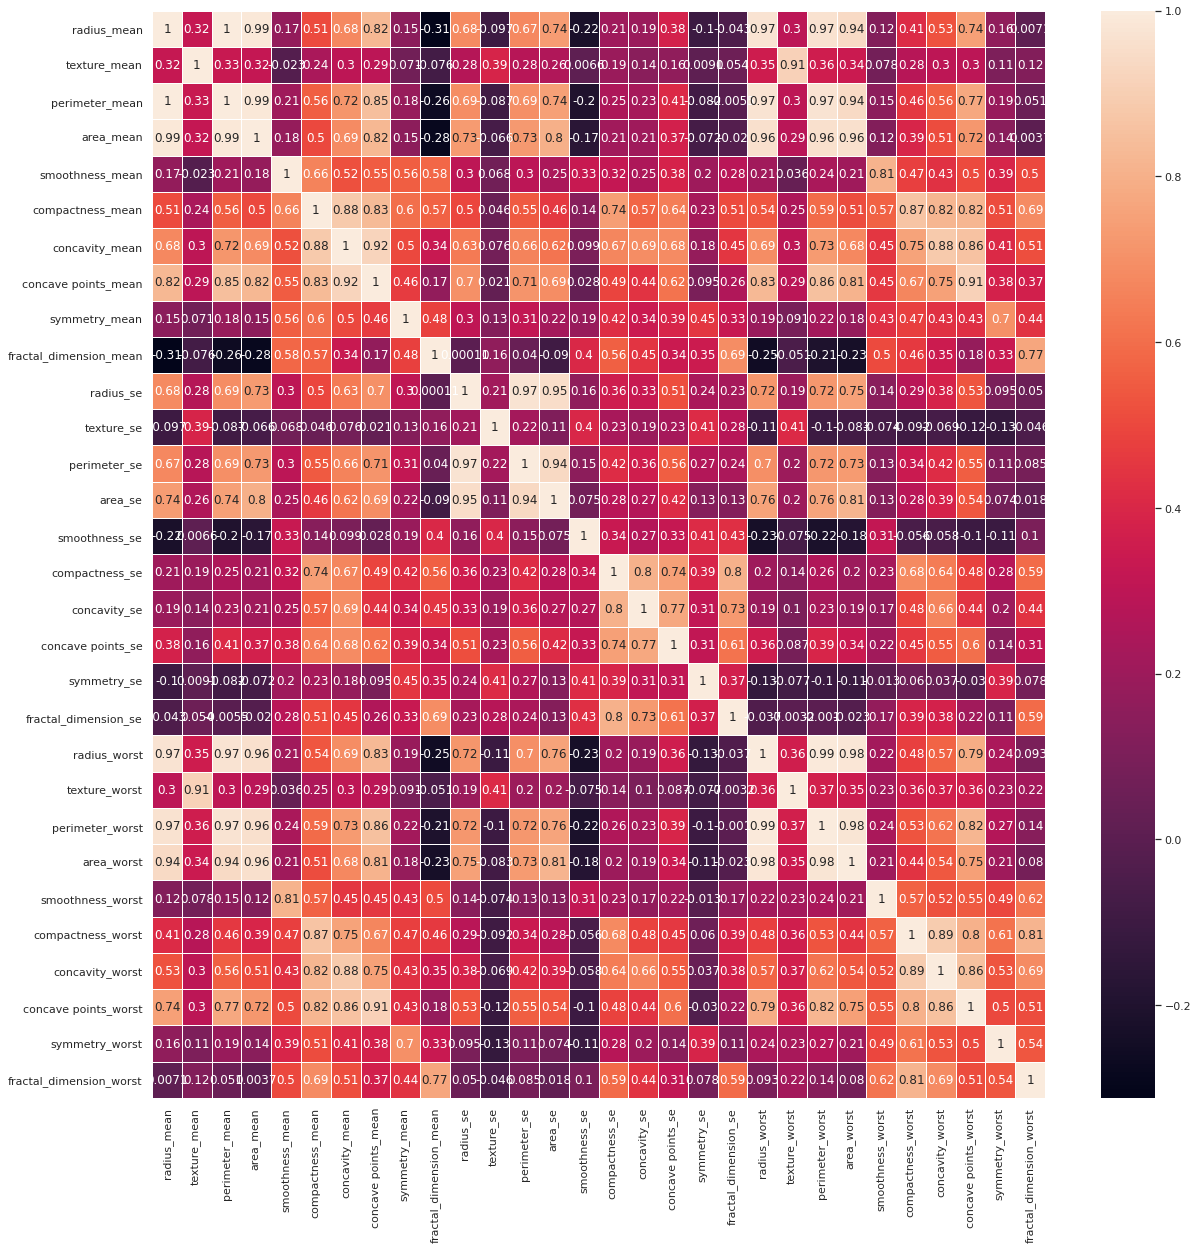

In [237]:
plt.figure(figsize = (20,20))
sns.heatmap(x.corr(), annot = True, linewidths = 0.5)

## 5. Feature Engineering

**We are labeling Benign as 0 and Malignant as 1.**

In [238]:
df["diagnosis"] = df["diagnosis"].replace({"B": 0, "M": 1})

**We are deleting id column because it does not benefit us for classification.**

In [239]:
df.drop("id", axis = 1, inplace = True)

**As we can see heatmap, radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst are highly correleated with each other so we will use only perimeter_worst. I decided it by looking at swar plots and perimeter_worst looks like more clear to me.**

**texture_mean, texture_worst are highly correleated with each other. By looking at swarm plot we chose texture_mean.**

**compactness_mean, concavity_mean, compactness_worst are highly correleated with each other. By looking at swarm plot we chose concavity_mean.**

**concavity_mean, concave points_mean, concavity_worst, concave points_worst are highly correleated with each other. By looking at swarm plot we chose concavity_mean.**

**radius_se, perimeter_se, area_se are highly correleated with each other. By looking at swarm plot we chose radius se.**

In [240]:
drop_list = ["radius_mean", "perimeter_mean", "area_mean", "radius_worst", "area_worst", "texture_worst",
             "compactness_mean", "compactness_worst", "concave points_mean", "concavity_worst", "concave points_worst",
             "perimeter_se", "area_se"]
df.drop(drop_list, axis = 1, inplace = True)

<AxesSubplot:>

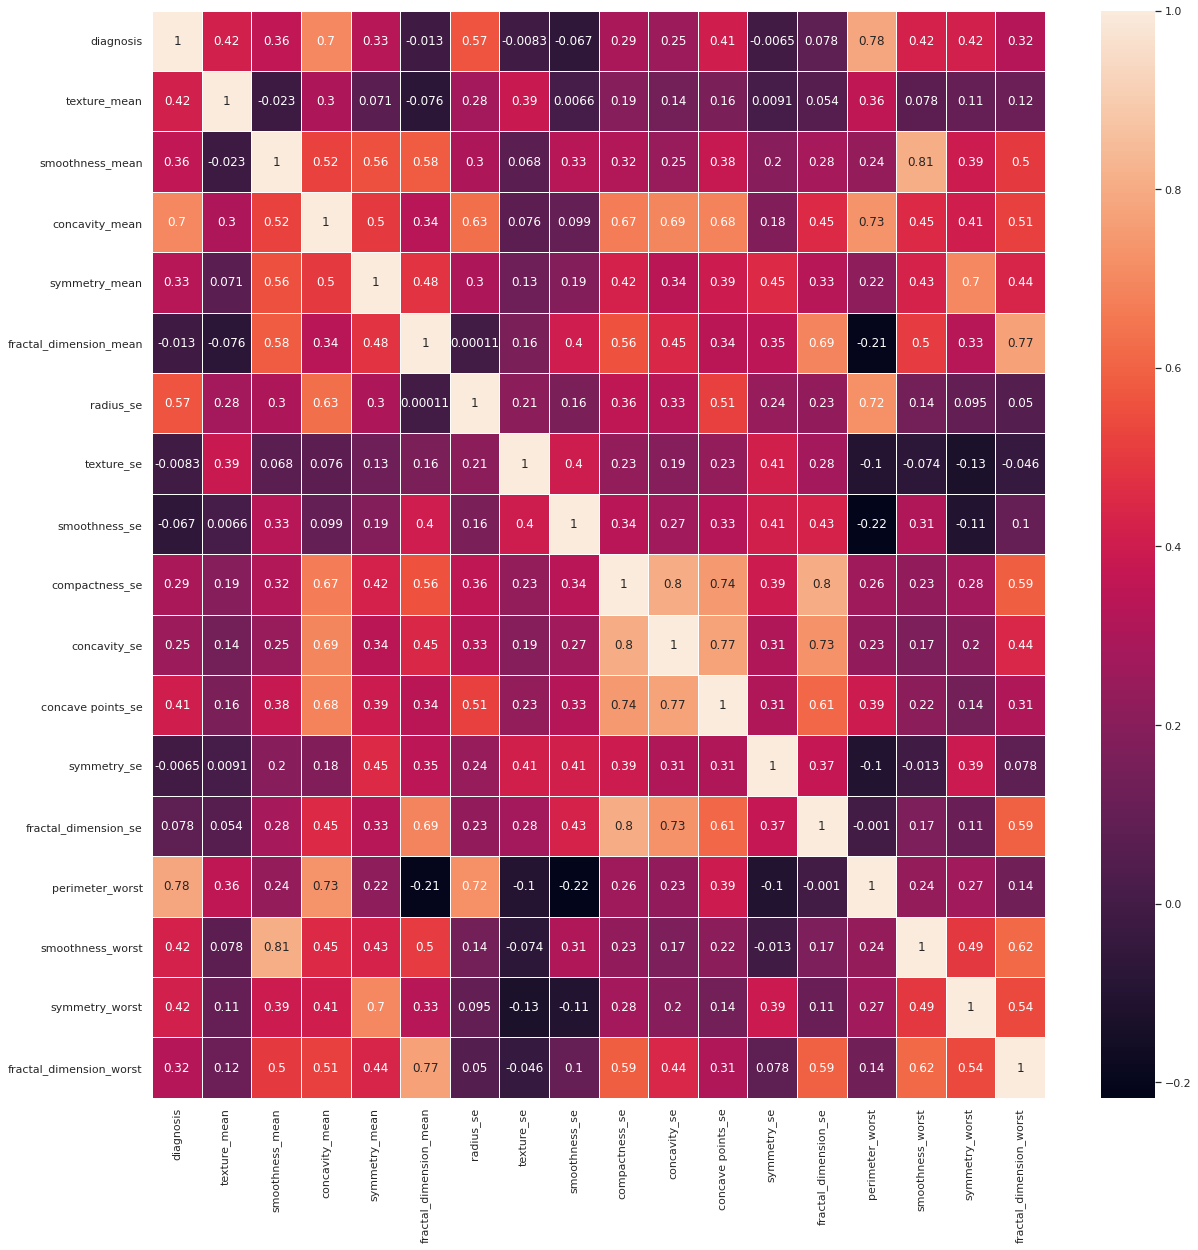

In [241]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)

**We determine x and y columns**

In [242]:
y = df["diagnosis"]
x = df.drop("diagnosis", axis = 1)

## 6. Modeling and Predicting

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

**Here we are trying MultinomialNB, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, XGBClassifier.**

### Multinomial Naive Bayes Classifier


In [244]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
pred_MNB = MNB.predict(x_test)

In [245]:
print(classification_report(pred_MNB, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        77
           1       0.65      0.76      0.70        37

    accuracy                           0.79       114
   macro avg       0.76      0.78      0.77       114
weighted avg       0.80      0.79      0.79       114



<AxesSubplot:>

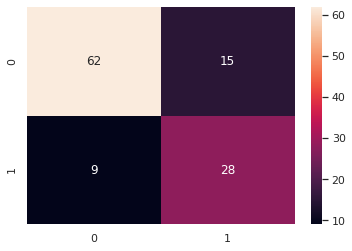

In [246]:
sns.heatmap(confusion_matrix(pred_MNB, y_test), annot = True)

### K Neighbors Classifier

In [247]:
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
pred_KNC = KNC.predict(x_test)

In [248]:
print(classification_report(pred_KNC, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

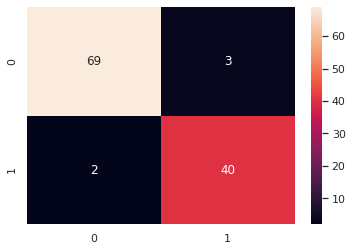

In [249]:
sns.heatmap(confusion_matrix(pred_KNC, y_test), annot = True)

### Support Vector Machine Classifier

In [250]:
SVC = SVC()
SVC.fit(x_train, y_train)
pred_SVC = SVC.predict(x_test)

In [251]:
print(classification_report(pred_SVC, y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        76
           1       0.88      1.00      0.94        38

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

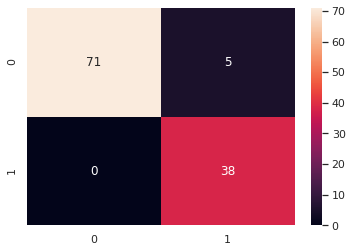

In [252]:
sns.heatmap(confusion_matrix(pred_SVC, y_test), annot = True)

### Decision Tree Classifier

In [253]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)

In [254]:
print(classification_report(pred_DTC, y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

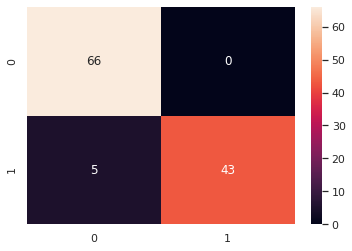

In [255]:
sns.heatmap(confusion_matrix(pred_DTC, y_test), annot = True)

### Random Forest Classifier

In [256]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)

In [257]:
print(classification_report(pred_RFC, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



<AxesSubplot:>

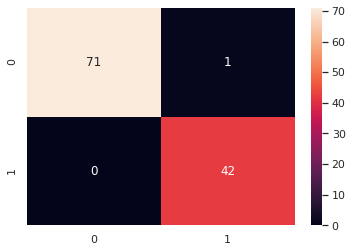

In [258]:
sns.heatmap(confusion_matrix(pred_RFC, y_test), annot = True)

### Gradient Boosting Classifier

In [259]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
pred_GBC = GBC.predict(x_test)

In [260]:
print(classification_report(pred_GBC, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

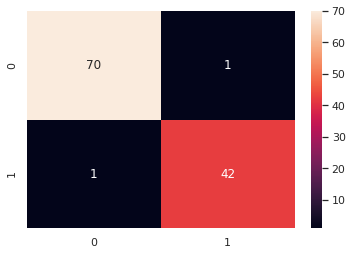

In [261]:
sns.heatmap(confusion_matrix(pred_GBC, y_test), annot = True)

### Extreme Gradient Boosting Classifier

In [262]:
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)

[15:25:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [263]:
print(classification_report(pred_XGBC, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



<AxesSubplot:>

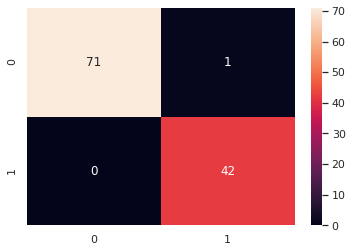

In [264]:
sns.heatmap(confusion_matrix(pred_XGBC, y_test), annot = True)

### We saw that the best classifier is Extreme Gradient Boosting Classifier(99%), Gradient Boosting Classifier(98%), Random Forest Classifier(98%) respectively.

**We delete highly correlated columns. It increased our accuracy.**

## Best Feature Selection

**2-) We looked at the correlations from the heatmap when choosing the features to use in the tutorial above and decided that way, but we can't always do that. That's why we're also trying a new method, SelectKBest.**

**In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.**

In [265]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5)
select_feature.fit(x_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x7feccea7c710>)

In [266]:
a = select_feature.scores_.tolist()
b = x_train.columns.to_list()
tup = list(zip(a, b))
sorted(tup, key = lambda x: x[0])

[(3.286824285010922e-05, 'symmetry_se'),
 (7.698176667359219e-05, 'fractal_dimension_mean'),
 (0.0011527931502276544, 'texture_se'),
 (0.0016072572172804477, 'fractal_dimension_se'),
 (0.0020506095541940007, 'smoothness_se'),
 (0.1293567778378451, 'smoothness_mean'),
 (0.1689298730132205, 'fractal_dimension_worst'),
 (0.21863208935044093, 'concave points_se'),
 (0.2295462881502397, 'symmetry_mean'),
 (0.34061283570514916, 'smoothness_worst'),
 (0.3967246695582506, 'compactness_se'),
 (0.6671256606079852, 'concavity_se'),
 (1.208404258799108, 'symmetry_worst'),
 (15.05639760458438, 'concavity_mean'),
 (26.41611512146008, 'radius_se'),
 (74.60503452574801, 'texture_mean'),
 (2835.8860001047033, 'perimeter_worst')]

**Best 5 feature to classify is that perimeter_worst, texture_mean, radius_se, concavity_mean, symmetry_worst. So lets se what happens if we use only these best scored 5 feature.**

In [267]:
x_train = select_feature.transform(x_train)
x_test = select_feature.transform(x_test)

### Extreme Gradient Boosting Classifier

In [268]:
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)

[15:25:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [269]:
print(classification_report(pred_XGBC, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

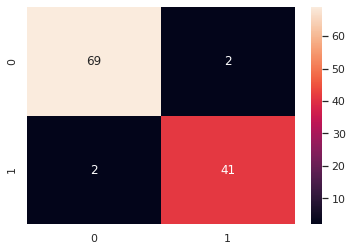

In [270]:
sns.heatmap(confusion_matrix(pred_XGBC, y_test), annot = True)

### Gradient Boosting Classifier

In [271]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
pred_GBC = GBC.predict(x_test)

In [272]:
print(classification_report(pred_GBC, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

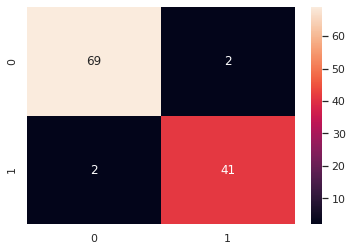

In [273]:
sns.heatmap(confusion_matrix(pred_GBC, y_test), annot = True)

### Random Forest Classifier

In [274]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)

In [275]:
print(classification_report(pred_RFC, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<AxesSubplot:>

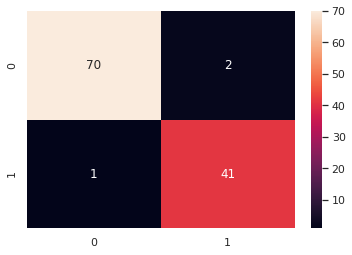

In [276]:
sns.heatmap(confusion_matrix(pred_RFC, y_test), annot = True)

**Accuracy is 96% and as it can be seen in confusion matrix, we make few wrong prediction. Although we use 5 features in selectkBest method accuracies look similar. We decreased the feature number from 31 to 5 which increases the training speed significantly. And 96% accuracy percent is still acceptable.**

**3-) Third method is RFE method. Let's try.**

In [277]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [278]:
from sklearn.feature_selection import RFE

RFC = RandomForestClassifier()      
rfe = RFE(estimator = RFC, n_features_to_select = 5, step = 1)
rfe = rfe.fit(x_train, y_train)

In [279]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'concavity_mean', 'radius_se', 'perimeter_worst',
       'smoothness_worst'],
      dtype='object')


**4-) Chosen 5 best features by rfe is texture_mean, concavity_mean, radius_se, perimeter_worst, smoothness_worst. Just one of them is different from previous(selectkBest) method. So it won't affect the result too much, we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. Now it's time to find the optimal value of the number of features. We determined as 5 but it does not have to be 5.**

In [280]:
from sklearn.feature_selection import RFECV

RFC = RandomForestClassifier() 
rfecv = RFECV(estimator = RFC, step = 1, cv = 5, scoring = "accuracy")   # 5 fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['texture_mean', 'concavity_mean', 'radius_se', 'concavity_se',
       'perimeter_worst', 'smoothness_worst', 'symmetry_worst'],
      dtype='object')


**We find that optimal number of features is 13. Let's plot this.**

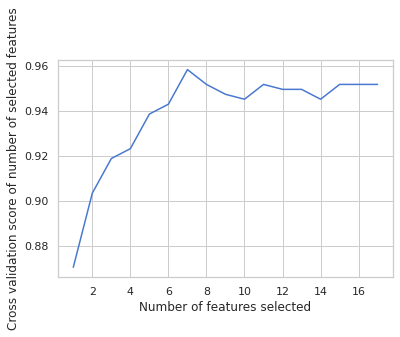

In [281]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

**5-) Finally we can use PCA method to reduce the number of features.**

Text(0, 0.5, 'explained_variance_ratio_')

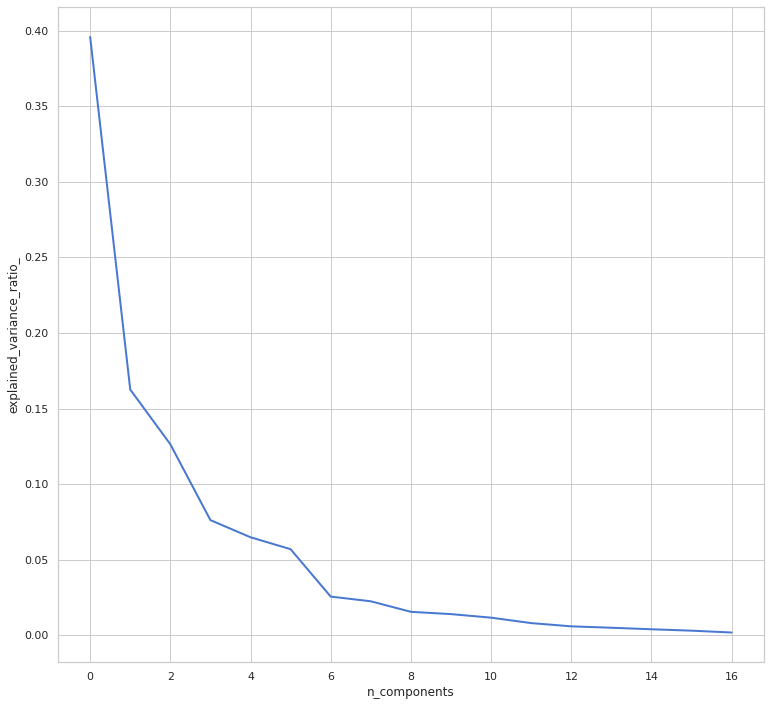

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#normalization
x_train_N = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
x_test_N = (x_test - x_test.mean()) / (x_test.max() - x_test.min())

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth = 2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

**According to variance ration, 3 component can be chosen. 95% of data is protected.**